Data Preprocessing:
1. Do we need all features?
No, dimensionality reduction techniques like PCA can help retain key information while reducing features.

2. Is preprocessing needed?
Yes, scaling is necessary to ensure features are comparable (e.g., using StandardScaler).

3. Do we know how to preprocess?
We scaled the data and applied PCA to reduce dimensionality.

4. Do we know what each feature represents?
No detailed description of each feature is available, but this is not critical for unsupervised learning.

5. Are two files (train/test) needed?
In unsupervised learning, a split is not required, as the goal is not to predict labels. For supervised learning, splitting helps validate performance.

6. Is a train/test split necessary in unsupervised learning?
No, because we're clustering without labels. However, for supervised learning, the split is important for model validation.

Import necessary libraries

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

1. LOAD THE DATA

In [2]:
# Corrected paths
train_features_path = r'C:\Kodilla\samsung\samsung_train.txt'
test_features_path = r'C:\Kodilla\samsung\samsung_test.txt'

train_labels_path = r'C:\Kodilla\samsung\samsung_train_labels.txt'
test_labels_path = r'C:\Kodilla\samsung\samsung_test_labels.txt'

# Check if files exist
print("Train features file exists:", os.path.exists(train_features_path))
print("Test features file exists:", os.path.exists(test_features_path))

# Load data into pandas DataFrames
train_features = pd.read_csv(train_features_path, sep='\s+', header=None)
test_features = pd.read_csv(test_features_path, sep='\s+', header=None)

train_labels = pd.read_csv(train_labels_path, sep='\s+', header=None)
test_labels = pd.read_csv(test_labels_path, sep='\s+', header=None)

# Print sample data to ensure loading worked
print("Train Features Sample:")
print(train_features.head())
print("Train Labels Sample:")
print(train_labels.head())

Train features file exists: True
Test features file exists: True
Train Features Sample:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.6

3. FEATURE SCALING

In [3]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Check scaling
print("Scaled Train Features Sample:")
print(train_features_scaled[:5])

Scaled Train Features Sample:
[[ 0.20064157 -0.0636826  -0.41962845 ... -0.68721921  0.40794614
  -0.00756789]
 [ 0.05594788  0.03148567 -0.25390836 ... -0.694138    0.40911698
   0.00787517]
 [ 0.07351535 -0.04341648 -0.07629468 ... -0.702239    0.4102883
   0.02650234]
 [ 0.06669577 -0.20842166 -0.24971245 ... -0.70168389  0.41465007
   0.03171414]
 [ 0.03046897  0.02758722 -0.10984784 ... -0.70015171  0.42546296
   0.04522502]]


4. DIMENSIONALITY REDUCTION USING PCA

In [4]:
pca = PCA(n_components=20)
train_features_pca = pca.fit_transform(train_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# Check PCA
print("PCA Reduced Train Features Sample:")
print(train_features_pca[:5])

PCA Reduced Train Features Sample:
[[-1.61385437e+01  2.15202401e+00  3.14478277e+00 -2.72466696e-01
   6.79892778e+00 -4.24940895e+00  2.93759420e+00 -4.90547964e+00
  -7.76727445e-01 -3.62383083e+00  7.08811162e-02  8.71682529e-01
   1.26596598e+00 -9.45294986e-01  2.78747978e+00  9.28483889e-01
  -1.78070522e+00 -3.94847179e+00  2.38382949e+00  3.01404645e-01]
 [-1.52961943e+01  1.38714379e+00 -6.82220946e-01  2.81367838e+00
   4.26616999e+00 -2.05564695e+00  1.10058265e-02 -1.84596797e+00
   4.93490063e-01 -1.80164437e-01 -1.16580716e+00  3.95958235e-03
   3.59265077e-02  8.43239551e-01  4.74257368e-01 -1.34269202e+00
   7.03144896e-01 -2.48457521e-02  1.01405930e+00  2.02594048e-02]
 [-1.51370186e+01  2.47335094e+00 -1.75663949e+00  3.71797623e+00
   4.18155937e+00 -1.35753803e+00  7.28981352e-02 -1.38814938e+00
   5.40314822e-01 -6.71138000e-01 -6.75292664e-01 -3.72003520e-01
   4.60357032e-01 -1.40715618e+00  8.64801368e-01 -4.57353137e-01
  -2.62622216e-01  8.91657921e-01  2.68

5. KMEANS CLUSTERING AND ADDING CLUSTER LABELS AS A FEATURE

In [5]:
kmeans = KMeans(n_clusters=6, random_state=42)
train_clusters = kmeans.fit_predict(train_features_pca)
test_clusters = kmeans.predict(test_features_pca)

# Adding cluster labels as a new feature to the dataset
train_features_with_clusters = pd.DataFrame(train_features_pca)
train_features_with_clusters['Cluster'] = train_clusters

test_features_with_clusters = pd.DataFrame(test_features_pca)
test_features_with_clusters['Cluster'] = test_clusters

# Check clustering
print("Train Features with Clusters Sample:")
print(train_features_with_clusters.head())


Train Features with Clusters Sample:
           0         1         2         3         4         5         6  \
0 -16.138544  2.152024  3.144783 -0.272467  6.798928 -4.249409  2.937594   
1 -15.296194  1.387144 -0.682221  2.813678  4.266170 -2.055647  0.011006   
2 -15.137019  2.473351 -1.756639  3.717976  4.181559 -1.357538  0.072898   
3 -15.350884  3.915681 -1.790323  2.567523  3.205842 -0.942951  0.530582   
4 -15.544814  4.598737 -2.188583  2.897578  3.080142 -1.061459 -1.048639   

          7         8         9  ...        11        12        13        14  \
0 -4.905480 -0.776727 -3.623831  ...  0.871683  1.265966 -0.945295  2.787480   
1 -1.845968  0.493490 -0.180164  ...  0.003960  0.035927  0.843240  0.474257   
2 -1.388149  0.540315 -0.671138  ... -0.372004  0.460357 -1.407156  0.864801   
3 -1.832109  1.072385 -1.498347  ... -0.269738 -1.355885 -0.263804 -0.635294   
4 -0.816971  0.599454  1.117906  ... -2.482736 -0.589643  1.108883 -0.590800   

         15        16    

6. TRAIN-TEST SPLIT

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_features_with_clusters, train_labels, test_size=0.3, random_state=42)

7. RANDOM FOREST WITH HYPERPARAMETER TUNING (Grid Search)

In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now proceed with the RandomForest training and prediction
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train.values.ravel())

# Predict with the best Random Forest model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Ensure to print the results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)


Random Forest Accuracy: 0.9102447869446962
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       366
           2       0.94      0.95      0.94       304
           3       0.95      0.94      0.95       311
           4       0.83      0.76      0.79       386
           5       0.81      0.88      0.84       411
           6       0.98      0.98      0.98       428

    accuracy                           0.91      2206
   macro avg       0.91      0.91      0.91      2206
weighted avg       0.91      0.91      0.91      2206



8. SUPPORT VECTOR MACHINE (SVM) WITH HYPERPARAMETER TUNING

In [9]:
svm_classifier = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=3)
grid_search_svm.fit(X_train, y_train.values.ravel())

# Predicting with the best SVM model
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Evaluating SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Display the SVM results
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Accuracy: 0.9310970081595649
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       366
           2       0.99      0.97      0.98       304
           3       0.99      0.98      0.99       311
           4       0.86      0.78      0.82       386
           5       0.82      0.88      0.85       411
           6       0.99      1.00      1.00       428

    accuracy                           0.93      2206
   macro avg       0.94      0.93      0.93      2206
weighted avg       0.93      0.93      0.93      2206



9. Implement Visuals

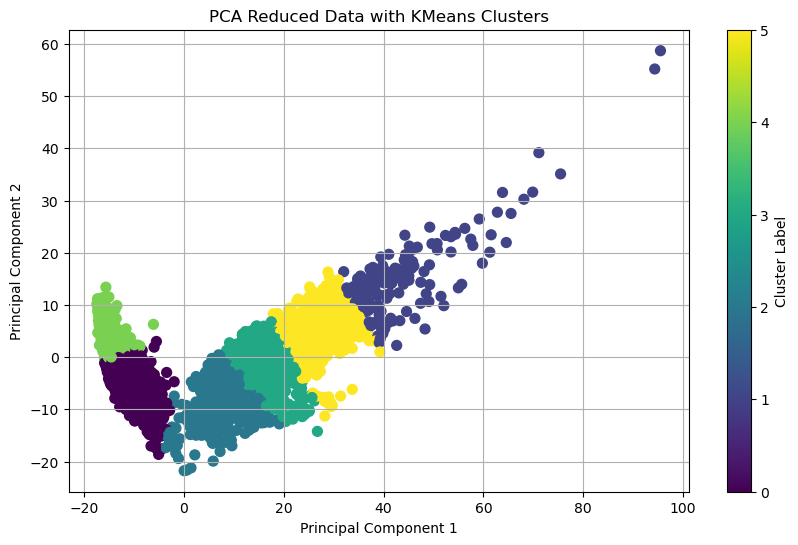

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load the data (Assuming data paths are correct)
train_features_path = r'C:\Kodilla\samsung\samsung_train.txt'
train_labels_path = r'C:\Kodilla\samsung\samsung_train_labels.txt'

train_features = pd.read_csv(train_features_path, sep='\s+', header=None)
train_labels = pd.read_csv(train_labels_path, sep='\s+', header=None)

# 2. Scale the data
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)

# 3. Reduce the dimensions using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
train_features_pca = pca.fit_transform(train_features_scaled)

# 4. Apply KMeans clustering to create clusters
kmeans = KMeans(n_clusters=6, random_state=42)  # Assuming 6 clusters (based on 6 activities)
train_clusters = kmeans.fit_predict(train_features_pca)

# 5. Visualize the PCA-reduced data and the clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_features_pca[:, 0], train_features_pca[:, 1], c=train_clusters, cmap='viridis', s=50)
plt.title("PCA Reduced Data with KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

1. KMeans:
Type: Clustering algorithm (unsupervised learning).
Function: It divides data into K clusters by minimizing the distance between data points and the center (centroid) of each cluster. It groups similar data points together without needing labeled data.

2. K-Fold Cross-Validation:
Type: Model evaluation technique (supervised learning).
Function: Splits the dataset into K subsets (folds). The model is trained on K-1 folds and tested on the remaining fold. This process repeats K times, ensuring each fold is used for testing once, helping assess the model's performance more reliably.

3. K Nearest Neighbors (KNN):
Type: Classification and regression algorithm (supervised learning).
Function: It classifies a data point based on the K nearest points in the feature space. For classification, it assigns the most common label among the K neighbors. For regression, it takes the average of the neighbors' values.